# 18: REGRESION LINEAL CON DATOS SIMULADOS

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Construcción de un dataframe ficticio con relación lineal

Un modelo de regresión lineal sigue la siguiente ecuación:

- Y = a + (b * X)


In [3]:
# Construcción de las variables de entrada con distribución normal, media 33 y desviación 5.5

x = np.random.normal(33, 5.5, 100)

In [4]:
# Construcción de un error que aplicaremos a la respuesta con distribución normal, media 0 y desviación 1

error = np.random.normal(0, 1, 100)

In [5]:
# Construcción de la respuesta del modelo para que estudiemos la regresión lineal

a = 23 

b = 1.2 # pendiente de la recta

y_respuesta = a + (b * x) + error

In [10]:
# Construcción del dataframe ficticio

data = pd.DataFrame({'x' : x.tolist(),
                     'y_respuesta' : y_respuesta.tolist()})

In [11]:
data.head()

,x,y_respuesta
0,35.010559,65.227561
1,38.750405,69.846612
2,32.225511,63.088375
3,36.886044,66.239313
4,41.743359,71.401203


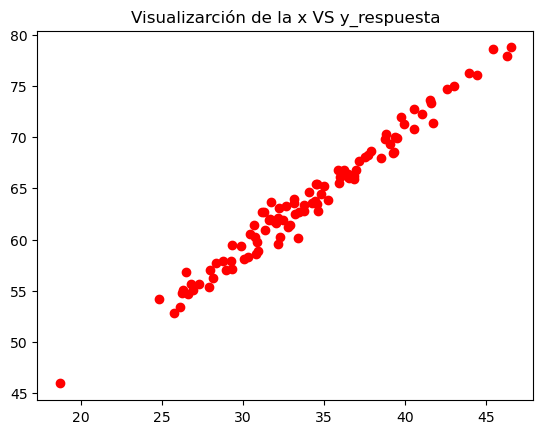

In [17]:
# Visualizar el dataframe ficticio

plt.plot(data['x'], data['y_respuesta'], 'ro')
plt.title('Visualizarción de la x VS y_respuesta')

%matplotlib inline

### Modelar la recta de regresión

Para modelar la recta de regresión, hay que calcular los valores de a y de b. Para ello, lo que hay que hacer es aplicar la siguiente fórmula:

- Y = a + (b * X)
  
- b = sumatorio((x_i - x_promedio) * (y_i - y_promedio)) / sumatorio((x_i - x_promedio) ^ 2)

- a = y_promedio - (b * x_promedio)

In [18]:
# Primero calculamos las medias de x y de la y_respuesta

x_media = np.mean(data['x'])
y_media = sum(data['y_respuesta']) / len(data) # otra forma de calcular la media

print(f'La media de x es {x_media} y la media de y es {y_media}')

La media de x es 34.05863013418148 y la media de y es 63.82615804689899


In [21]:
# Calculamos el valor de b a partir del numerador y el denominador de la fórmula

numerador = sum((data['x'] - x_media) * (data['y_respuesta'] - y_media))
denominador = sum((data['x'] - x_media) ** 2 )

b_pred = numerador / denominador
b_pred

1.1785006072692426

In [22]:
# Calculamos el valor de a a partir del valor b

a_pred = y_media - (b_pred * x_media)
a_pred

23.688041751007596

In [24]:
print(f'El modelo lineal modelado es: Y = {round(a_pred, 2)} + {round(b_pred, 2)} * x')
print(f'El data frame que hemos creado realmente es: Y = 23 + 1.2 * x')

El modelo lineal modelado es: Y = 23.69 + 1.18 * x
El data frame que hemos creado realmente es: Y = 23 + 1.2 * x


In [25]:
# Predecir la respuesta del sistema a partir del modelo de regresión lineal

data['y_prediccion'] = a_pred + b_pred * data['x']

In [26]:
data.head()

,x,y_respuesta,y_prediccion
0,35.010559,65.227561,64.948006
1,38.750405,69.846612,69.355418
2,32.225511,63.088375,61.665826
3,36.886044,66.239313,67.158267
4,41.743359,71.401203,72.882615


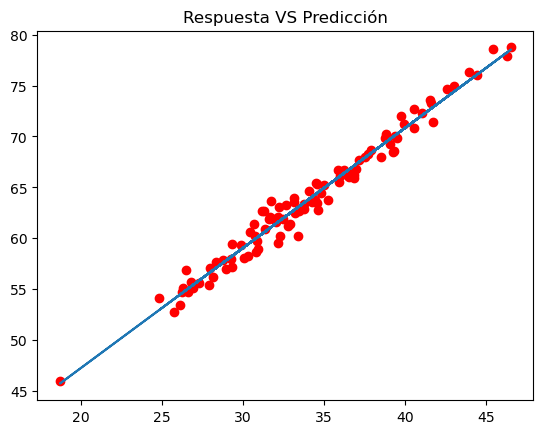

In [28]:
# Visualizar el modelo superpuesto a la respuesta

plt.plot(data['x'], data['y_respuesta'], 'ro')
plt.plot(data['x'], data['y_prediccion'])
plt.title('Respuesta VS Predicción')

%matplotlib inline

### Parametros para determinar la bondad del modelo

- SSD: Diferencia entre la y_respuesta y la y_prediccion. Debería seguir una distribución normal
- SSD = sumatorio(y_respuesta_i - y_prediccion_i) ^ 2

- SSR: Diferencia entre la y_prediccion y la y_media
- SSR = sumatorio(y_prediccion_i - y_media) ^ 2

- SST: Diferencia entre la y_respuesta y la y_media
- SST = sumatorio(y_respuesta_i - y_media) ^ 2 ------ o ------ SST = SSD + SSR

- R2: Coeficiente de determinación (entre 0 y 1) --> Cuanto mayor, mejor es el modelo
- R2 = SSR / SST


In [33]:
# Calcular SSD

ssd = sum((data['y_prediccion'] - data['y_respuesta']) ** 2)

In [35]:
# Calcular SSR

ssr = sum((data['y_prediccion'] - y_media) ** 2)

In [37]:
# Calcular SST

sst = ssd + ssr

In [38]:
# Calcular R2

R2 = ssr / sst

In [39]:
print(f'SSD es {round(ssd, 2)}')
print(f'SSR es {round(ssr, 2)}')
print(f'SST es {round(sst, 2)}')
print(f'R2 es {round(R2, 2)}')

SSD es 98.47
SSR es 3851.68
SST es 3950.14
R2 es 0.98


### Error Estándar de los residuos (RSE)

Se trata de la desviación estándar del término del error, es decir, aquello que le modelo no es capaz de explicar. La fórmula es:

- RSE = raiz(SSD / n - 2) donde n es el número de muestras (len(data))

In [40]:
rse = np.sqrt(ssd / (len(data) - 2))
rse

1.0023727422734376